# Learning Activations in Neural Networks

## Importing Libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

## Dataset

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Wisconsin-Breast-Cancer-Dataset')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.shape

(569, 33)

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
target = {"diagnosis": {'B':1, 'M':0}}
df = df.replace(target)

In [13]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [14]:
df.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True)

In [15]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Preparing Data for the model

In [25]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [26]:
y=to_categorical(y) # One-Hot Encoding

In [37]:
#Splitting Dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3) 

In [22]:
y.shape

(569, 2)

## Implementing Algorithm

In [17]:
#  Activation functions
def ada_act(x, k0, k1):
    return k0 + k1 * x

def ada_act_derivative(x, k0, k1):
    return k1

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Forward propagation 
def forward_propagation(X, parameters):
    W1, b1, W2, b2, K = parameters
    z1 = np.dot(X, W1) + b1
    a1 = ada_act(z1, K[0], K[1])
    z2 = np.dot(a1, W2) + b2    
    a2 = softmax(z2)
    return a1, a2

def backward_propagation(X, y, parameters, activations):
    W1, b1, W2, b2, K = parameters
    a1, a2 = activations
    
    m = X.shape[0] # Number of training examples

    dz2 = a2 - y
    dw2 = (1/m) * np.dot(a1.T, dz2)
    db2 = np.mean(dz2, axis=0, keepdims=True)
    da1 = np.dot(dz2, W2.T)
    dz1 = ada_act_derivative(a1, K[0], K[1]) * da1
    dw1 = (1/m) * np.dot(X.T, dz1)
    db1 = np.mean(dz1, axis=0, keepdims=True)   
 

    dK1 = np.array([
        np.mean(da1),
        np.mean(da1 * a1),
        np.mean(da1 * a1**2)
    ]).reshape((3,1))
    dK = dK1
    
    gradients = {
        'dW1': dw1,
        'db1': db1,
        'dW2': dw2,
        'db2': db2,        
        'dK': dK
    }
    return gradients

def update_parameters(parameters, gradients, learning_rate):
    W1, b1, W2, b2, K = parameters
    dW1, db1, dW2, db2, dK = gradients    
    W1 -= learning_rate * gradients['dW1']
    b1 -= learning_rate * gradients['db1']
    W2 -= learning_rate * gradients['dW2']
    b2 -= learning_rate * gradients['db2']
    K -= learning_rate * gradients['dK']
    
    updated_parameters = (W1, b1, W2, b2, K)
    return updated_parameters



In [111]:
def loss_fn(y,y_pred):
  return -np.mean(np.sum(y * np.log(y_pred), axis=1))

def train(X, y, num_epochs, learning_rate):
    train_loss,train_acc=[],[]
    np.random.seed(55)
    
    # Initialize the parameters
    n_features = X.shape[1]
    n_hidden = 3
    n_classes = y.shape[1]
    
    W1 = np.random.randn(n_features, n_hidden) * 0.01
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_classes) * 0.01
    b2 = np.zeros((1, n_classes))
    K = np.random.randn(2, 1)
    
    parameters = (W1, b1, W2, b2, K)
    ip={'W1':W1,'b1':b1,'W2':W2,'b2':b2,'K':K}
    for epoch in range(num_epochs):
        # Forward propagation
        activations = forward_propagation(X, parameters)
        
        # Backward propagation
        gradients = backward_propagation(X, y, parameters, activations)
        
        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)        
       
        _, a2 = activations
        actual = y.argmax(axis=1)
        predicted = one_d(predict(X, parameters))
        train_acc.append(accuracy(actual, predicted))
        loss = loss_fn(y,a2)
        train_loss.append(loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}')
        fp={'W1':W1,'b1':b1,'W2':W2,'b2':b2,'K':K}
    
    return ip,fp,parameters,train_loss,train_acc

def accuracy(actual, predicted):
        correct = 0
        for i in range(len(actual)):
                if actual[i] == predicted[i]:
                        correct += 1
        return correct / float(len(actual)) 

def predict(X, parameters):
        _,outputs = forward_propagation(X, parameters)
        return outputs

def one_d(y):
  return y.argmax(axis=1) # 1-D array of predictions


In [112]:
num_epochs = 20
learning_rate = 0.008
ip,fp,parameters,train_loss,train_acc = train(X_train, y_train, num_epochs, learning_rate)

Epoch 1/20, Loss: 0.6910
Epoch 2/20, Loss: 0.6832
Epoch 3/20, Loss: 0.6757
Epoch 4/20, Loss: 0.6678
Epoch 5/20, Loss: 0.6594
Epoch 6/20, Loss: 0.6506
Epoch 7/20, Loss: 0.6415
Epoch 8/20, Loss: 0.6321
Epoch 9/20, Loss: 0.6226
Epoch 10/20, Loss: 0.6129
Epoch 11/20, Loss: 0.6029
Epoch 12/20, Loss: 0.5928
Epoch 13/20, Loss: 0.5824
Epoch 14/20, Loss: 0.5718
Epoch 15/20, Loss: 0.5610
Epoch 16/20, Loss: 0.5501
Epoch 17/20, Loss: 0.5391
Epoch 18/20, Loss: 0.5281
Epoch 19/20, Loss: 0.5170
Epoch 20/20, Loss: 0.5060


In [113]:
# Initial Parameters
ip

{'W1': array([[-1.76977105e-02, -4.36855841e-03, -1.95473157e-02],
        [ 9.93968233e-05, -3.31479605e-03, -6.33480787e-03],
        [-8.95722036e-03, -1.70422852e-02,  1.15340117e-04],
        [-1.82446331e-02, -1.02105986e-02, -2.54238405e-02],
        [ 1.66493717e-02, -2.00693903e-02, -4.79363864e-03],
        [ 1.36835018e-02,  2.57130567e-03,  7.01907657e-03],
        [ 8.89276787e-03,  7.24359299e-03, -1.38119849e-02],
        [-9.93004907e-03, -1.68371544e-03,  2.88436674e-03],
        [ 2.94270076e-03, -1.94119983e-03, -3.70882389e-03],
        [ 1.44966321e-02,  2.16566145e-03,  4.44005713e-03],
        [-2.11307374e-03, -5.08086151e-03,  3.99426825e-03],
        [ 9.97647776e-03,  1.16408383e-02,  4.33297536e-03],
        [-1.35895500e-02,  7.90478882e-03, -1.57410221e-02],
        [-8.71363506e-03,  1.22974795e-03, -5.02293744e-03],
        [ 8.98462264e-03,  4.45177135e-03,  6.28300424e-03],
        [-6.89101113e-03,  1.49424946e-03,  1.26406678e-02],
        [-1.214649

In [114]:
# Final Parameters
fp

{'W1': array([[-1.76977105e-02, -4.36855841e-03, -1.95473157e-02],
        [ 9.93968233e-05, -3.31479605e-03, -6.33480787e-03],
        [-8.95722036e-03, -1.70422852e-02,  1.15340117e-04],
        [-1.82446331e-02, -1.02105986e-02, -2.54238405e-02],
        [ 1.66493717e-02, -2.00693903e-02, -4.79363864e-03],
        [ 1.36835018e-02,  2.57130567e-03,  7.01907657e-03],
        [ 8.89276787e-03,  7.24359299e-03, -1.38119849e-02],
        [-9.93004907e-03, -1.68371544e-03,  2.88436674e-03],
        [ 2.94270076e-03, -1.94119983e-03, -3.70882389e-03],
        [ 1.44966321e-02,  2.16566145e-03,  4.44005713e-03],
        [-2.11307374e-03, -5.08086151e-03,  3.99426825e-03],
        [ 9.97647776e-03,  1.16408383e-02,  4.33297536e-03],
        [-1.35895500e-02,  7.90478882e-03, -1.57410221e-02],
        [-8.71363506e-03,  1.22974795e-03, -5.02293744e-03],
        [ 8.98462264e-03,  4.45177135e-03,  6.28300424e-03],
        [-6.89101113e-03,  1.49424946e-03,  1.26406678e-02],
        [-1.214649

## Evaluating Model

Text(0, 0.5, 'Accuracy')

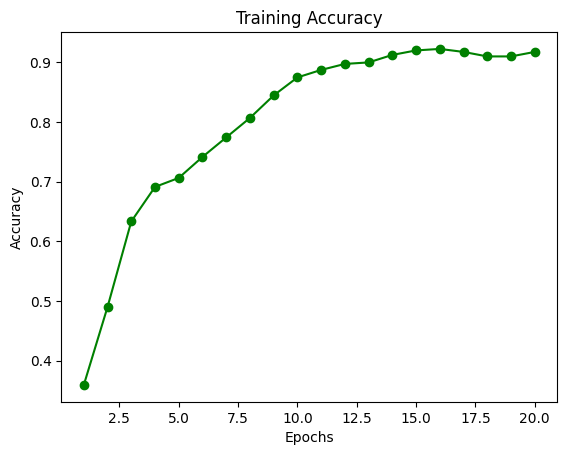

In [96]:
epochs = range(1,21)
plt.plot(epochs, train_acc, 'g', marker='o')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

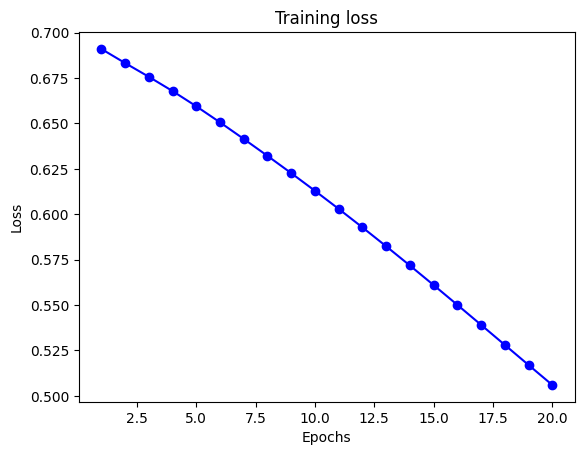

In [97]:
plt.plot(epochs, train_loss, 'b', marker='o')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [90]:
def evaluate():
  y_hat_train=predict(X_train,parameters)
  print(f'Train Loss:{loss_fn(y_train, y_hat_train) : .4f}\t\tTrain Accuracy:{accuracy(one_d(y_train),one_d(y_hat_train)) : .4f}')
  y_hat=predict(X_test,parameters)
  y_true,y_pred=one_d(y_test),one_d(y_hat)
  print(f'Test Loss:{loss_fn(y_test, y_hat) : .4f}\t\tTest Accuracy:{accuracy(y_true,y_pred) : .4f}\n')
  print(classification_report(y_true,y_pred))
  cm = confusion_matrix(y_true,y_pred)  
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

Train Loss: 0.4951		Train Accuracy: 0.9171
Test Loss: 0.4893		Test Accuracy: 0.9240

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        70
           1       0.89      1.00      0.94       101

    accuracy                           0.92       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



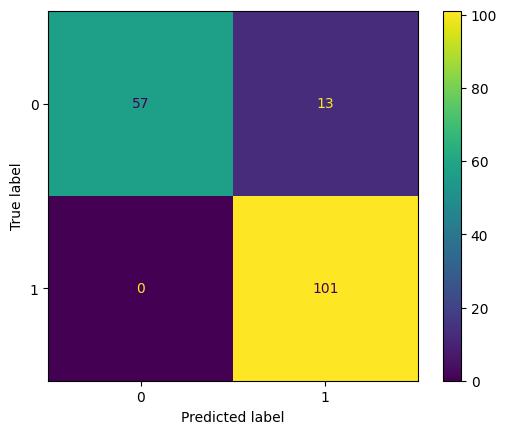

In [91]:
evaluate()